___
# Análise Exploratória: Duas variáveis quantitativas
___

## Aula 04 - Atividade

<div id="indice"></div>

## Índice

- [Mundo](#mundo)
- [Gráfico de Dispersão](#grafico-dispersao)
    - [Exercício 1](#ex1)
    - [Exercício 2](#ex2)
    - [Exercício 3](#ex3)
- [Coeficiênte de Covariância](#covariancia)
    - [Exercício 4](#ex4)
    - [Exercício 5](#ex5)
    - [Exercício 6](#ex6)
- [Coeficiente de Correlação Linear](#correlacao)
    - [Exercício 7](#ex7)
    - [Exercício 8](#ex8)
    - [Exercício 9 (opcional)](#ex9)
- [Lista de comandos utilizados neste notebook](#comandos)

___

<div id="mundo"></div>

___
## <font color='blue'>Mundo</font>

A análise bidimensional tem como objetivo encontrar associação ou relação entre as variáveis quantitativas. Essas relações podem ser identificadas através de gráficos ou medidas numéricas. Entende-se por associação a mudança de opinião sobre o comportamento de uma variável na presença de informação sobre a segunda variável.

Inicialmente, a base de dados `Mundo.xlsx` será explorada com intuito de entender a associação entre algumas de suas variáveis quantitativas. Esse conjunto de dados contém alguns indicadores socioeconômicos referentes ao ano de 2008 para 85 países, os quais são:  

- `X1`: população em milhares de habitantes  
- `X2`: densidade populacional  
- `X3`: % de população urbana  
- `X4`: expectativa de vida feminina  
- `X5`: expectativa de vida masculina  
- `X6`: crescimento populacional  
- `X7`: mortalidade infantil  
- `X8`: PIB per capita  
- `X9`: % de mulheres alfabetizadas  
- `X10`: população em 100.000 habitantes  

Neste estudo queremos explorar possíveis associações entre as variáveis da nossa base de dados.

In [2]:
%matplotlib inline
# A linha acima é necessária para visualizar os gráficos no jupyter notebook

import os
import pandas as pd
# Módulo com funções matemáticas para arrays multidimensionais (matrizes)
import numpy as np
# Módulo com funções de geração de gráficos
import matplotlib.pyplot as plt

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\rodrigo\Desktop\CD21-1\aula04


In [4]:
# Carregando os dados
mundo = pd.read_excel('Mundo.xlsx')
mundo.head(5)

,i,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Unnamed: 11
0,1,20500,25.0,18,44,45,2.80,168.0,205,14,0.205,NaN
1,2,33900,12.0,86,75,68,1.30,25.6,3408,95,0.339,NaN
2,3,3700,126.0,68,75,68,1.40,27.0,5000,100,0.037,NaN
3,4,17800,2.3,85,80,74,1.38,7.3,16848,100,0.178,NaN
4,5,7400,86.0,54,75,67,1.40,35.0,3000,100,0.074,NaN


<div id="grafico-dispersao"></div>

## Gráfico de Dispersão

Um gráfico de dispersão pode ser utilizado para compreender a relação entre duas variáveis quantitativas. Não necessariamente essa relação implica em causalidade (https://economiadependrive.wordpress.com/2014/09/25/correlacao-nao-implica-em-causalidade/)  e, em alguns casos, pode se tratar de uma relação espúria (http://www.tylervigen.com/spurious-correlations).

Vamos construir um gráfico de dispersão entre as variáveis `X3` (eixo das abscissas) e `X4` (eixo das ordenadas). Cada ponto ⧫ desse gráfico representa um país da base de dados com o par de coordenadas nessas duas variáveis quantitativas.

Utilizaremos a biblioteca `matplotlib` para construir nossos gráficos. Se tiver curiosidade, um artigo introdutório sobre a biblioteca pode ser encontrado aqui: https://realpython.com/python-matplotlib-guide/

<div id="plt-scatter"></div>
<div id="plt-show"></div>

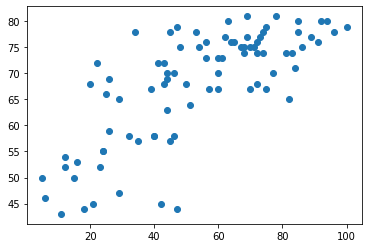

In [5]:
# Lembre-se que mundo.X3 é equivalente a mundo['X3']
plt.scatter(mundo.X3, mundo.X4)
# Mostrando o gráfico
plt.show()

O gráfico acima ainda está bastante incompleto. Suponha que você precisa apresentar essas visualizações para outra pessoa. O que está faltando?

...

É importante que uma visualização seja compreensível sem a necessidade de uma pessoa apresentando. Para chegar nesse ponto com o nosso gráfico faltam algumas coisas básicas: sobre o que esse gráfico trata (título)? O que significam os valores em cada eixo (x e y)?

Além disso, é difícil saber se uma região tem mais pontos do que outra se os pontos estão sobrepostos. Vamos mudar a cor dos pontos e adicionar transparência. Assim, se muitos pontos estiverem sobrepostos a região será mais escura. Procure pela documentação da função `scatter` do `matplotlib` para saber outras possíveis modificações.

Vamos adicionar essas informações:

<div id="plt-title"></div>
<div id="plt-xlabel"></div>
<div id="plt-ylabel"></div>

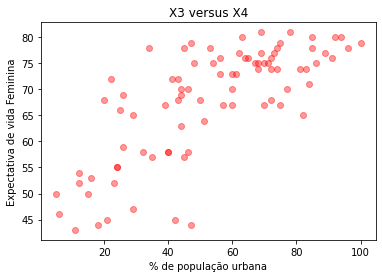

In [6]:
plt.scatter(mundo.X3, mundo.X4, c='red', alpha=0.4)
plt.title('X3 versus X4')
plt.xlabel('% de população urbana')
plt.ylabel('Expectativa de vida Feminina')
plt.show()

### Observação

Note que o `DataFrame` do *pandas* também possui um método que gera um gráfico de dispersão (*scatterplot*). Ele é compatível com o `matplotlib`, então pode ser utilizado para substituir o comando `plt.scatter` mantendo o resto do código intacto.

<div id="df-scatter"></div>

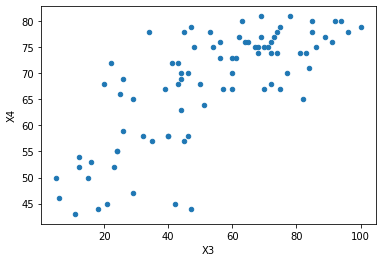

In [7]:
mundo.plot.scatter(x="X3", y="X4");

Bem mais claro! Mas o que podemos aprender com esse gráfico de dispersão? 

<div id="ex1"></div>

### EXERCÍCIO 1:

Considerando apenas o gráfico, você espera que exista algum tipo de associação entre as variáveis `X3` e `X4`? Se sim, você espera que essa associação seja positiva ou negativa? Forte ou fraca?

ESCREVA AQUI SUA RESPOSTA

Nessa análise exploratória nós vamos explorar diversas relações entre duas variáveis. Ao criarmos um novo gráfico para cada relação, vamos precisar de bastante espaço. Uma maneira de utilizar o espaço mais eficientemente é desenhar os gráficos lado a lado.

Para criar mais do que um gráfico na mesma figura, precisamos inicialmente criar uma `plt.figure`.

<div id="plt-figure"></div>
<div id="plt-subplot"></div>

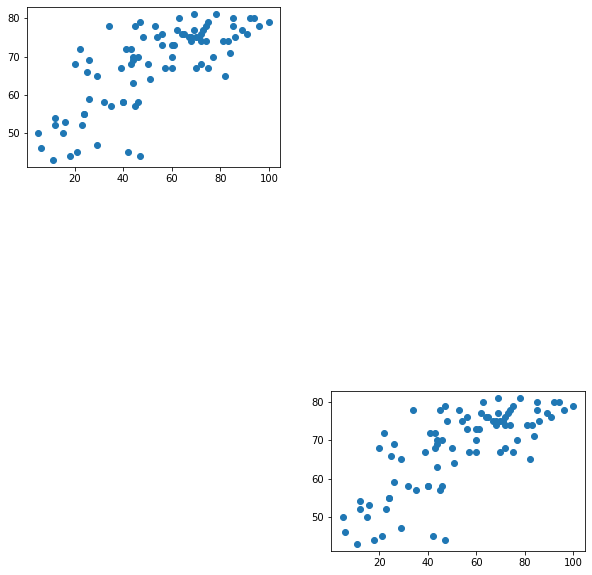

In [8]:
# figsize é a largura e altura da figura em polegadas
fig = plt.figure(figsize=(10, 10))

# Vamos dividir a figura em partes menores (subplots). 
# Os dois primeiros argumentos são o número de linhas e o número de colunas de subplots nós desejamos.
# O terceiro argumento representa o índice do subplot que vamos ativar para ser desenhado. 
# Ele começa em 1 no canto superior esquerdo e aumenta para a direita. No nosso exemplo temos 3 linhas e 2 colunas.
# Assim, a ordem dos índices será:
#
# 1 | 2 
# 3 | 4
# 5 | 6
#
# Em alguns lugares você vai encontrar a forma alternativa plt.subplot(321). 
# Procure a documentação do matplotlib subplot para entender o que essa entrada de 3 dígitos significa.
plt.subplot(3, 2, 1)

# Vamos desenhar um plot simples como exemplo. Lembre-se que quando for implementar a sua versão
# é importante adicionar informações como o título e o significado de cada eixo.
plt.scatter(mundo.X3, mundo.X4)

# Ativando outro subplot...
plt.subplot(3, 2, 6)
# E desenhando outro gráfico
plt.scatter(mundo.X3, mundo.X4)
plt.show()

<div id="ex2"></div>

### EXERCÍCIO 2:

Na figura acima nós geramos apenas dois gráficos (iguais). Utilize essa abordagem de `subplot`s para construir gráficos de dispersão entre as variáveis `X3` e `X4`, as variáveis `X3` e `X5`, as variáveis `X3` e `X6` e as variáveis `X3` e `X7`. Utilize 2 linhas e 2 colunas e lembre-se de indicar o que cada um dos gráficos representa (título e significado dos eixos).

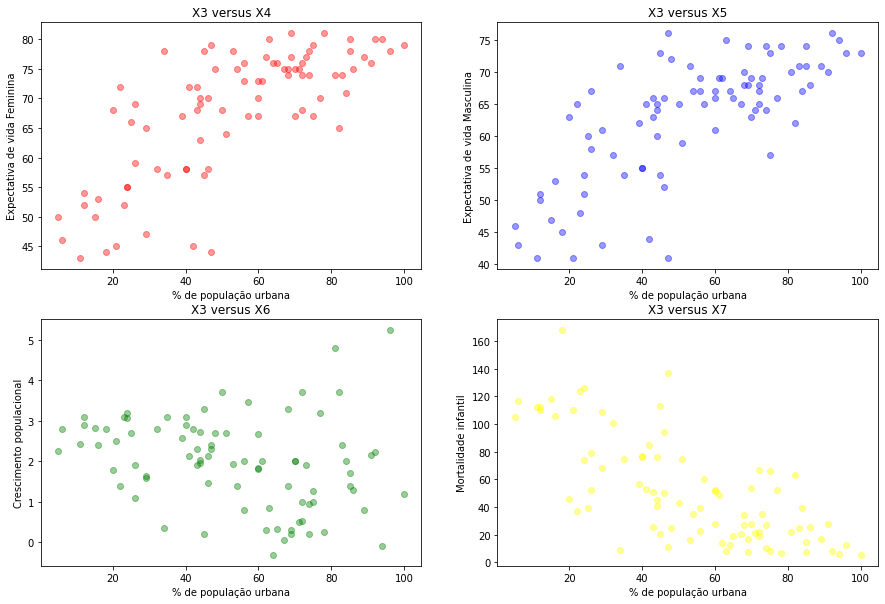

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(mundo.X3, mundo.X4, c='red', alpha=0.4)
plt.title('X3 versus X4')
plt.xlabel('% de população urbana')
plt.ylabel('Expectativa de vida Feminina')

plt.subplot(2, 2, 2)
plt.scatter(mundo.X3, mundo.X5, c='blue', alpha=0.4)
plt.title('X3 versus X5')
plt.xlabel('% de população urbana')
plt.ylabel('Expectativa de vida Masculina')

plt.subplot(2, 2, 3)
plt.scatter(mundo.X3, mundo.X6, c='green', alpha=0.4)
plt.title('X3 versus X6')
plt.xlabel('% de população urbana')
plt.ylabel('Crescimento populacional')

plt.subplot(2, 2, 4)
plt.scatter(mundo.X3, mundo.X7, c='yellow', alpha=0.4)
plt.title('X3 versus X7')
plt.xlabel('% de população urbana')
plt.ylabel('Mortalidade infantil')

plt.show()

<div id="ex3"></div>

### EXERCÍCIO 3:

Para cada um dos três novos gráficos, descreva a relação entre as variáveis (associação positiva/negativa, forte/fraca).

1. associação positiva forte
2. associação positiva forte
3. associação negativa fraca
4. associação negativa forte

<div id="covariancia"></div>

## Coeficiente de Covariância

O gráfico de dispersão é uma ferramenta descritiva simples, porém útil para examinar uma possível relação entre variáveis quantitativas. A literatura estatística apresenta uma medida, nomeada de covariância, cujo sinal pode ser um indicativo do tipo de associação linear: positiva, se maior que zero; negativa, se menor que zero; e ausente de associação linear, se igual a zero. 

$$\mathrm{Cov}(X, Y) = \frac{1}{n} \sum^n_{i=1}(x_i - \overline{x})(y_i - \overline{y}) \quad\quad\quad\quad (1)$$

A biblioteca `pandas` já possui a função `.cov` em um `pd.Series` (coluna do `DataFrame`) para o cálculo da covariância:

<div id="cov"></div>

In [14]:
mundo.X3.cov(mundo.X4)

194.34985994397758

<div id="ex4"></div>

### EXERCÍCIO 4:

Considere o código a seguir. O resultado deveria ser o mesmo? Justifique. *Dica: olhe para a fórmula da covariância.*

In [15]:
cov_X3_X4 = mundo.X3.cov(mundo.X4)
cov_X4_X3 = mundo.X4.cov(mundo.X3)
print('{0} = {1}?'.format(cov_X3_X4, cov_X4_X3))

194.34985994397758 = 194.34985994397758?


ESCREVA AQUI SUA RESPOSTA

<div id="ex5"></div>

### EXERCÍCIO 5:

Calcule a covariância para cada par de variáveis utilizadas nos gráficos acima.

In [16]:
print(mundo.X3.cov(mundo.X4))
print(mundo.X3.cov(mundo.X5))
print(mundo.X3.cov(mundo.X6))
print(mundo.X3.cov(mundo.X7))

194.34985994397758
166.23011204481793
-6.846322128851538
-671.6780084033612


<div id="ex6"></div>

### EXERCÍCIO 6:

Contraste as suas interpretações gráficas (exercícios [1](#ex1) e [3](#ex3)) e os resultados das covariâncias (exercício [5](#ex5)). Como essa medida traduz o sinal da associação entre as variáveis quantitativas?

ESCREVA AQUI SUA RESPOSTA

<div id="correlacao"></div>

## Coeficiente de Correlação Linear

Ignorando-se o sinal, a covariância de `X3` e `X7` é mais do que o dobro da covariância de `X3` e `X4`. Entretanto, considerando os respectivos gráficos, as relações não parecem muito mais fortes no primeiro caso do que no segundo. Existe aqui um perigo de se comparar valores que, na verdade, não são comparáveis. O coeficiente de correlação linear garante que os valores estarão sempre entre -1 e 1:

$$\mathrm{Corr}(X, Y) = \frac{\mathrm{Cov}(X, Y)}{\mathrm{DP}(X)\mathrm{DP}(Y)}$$

De maneira análoga à covariância, a biblioteca `pandas` também possui a função `.corr` em um `pd.Series` (coluna do `DataFrame`) para o cálculo da correlação.

<div id="corr"></div>

<div id="ex7"></div>

### EXERCÍCIO 7:

Calcule o coeficiente de correlação linear para cada par de variáveis utilizadas nos gráficos acima.

In [17]:
print(mundo.X3.corr(mundo.X4))
print(mundo.X3.corr(mundo.X5))
print(mundo.X3.corr(mundo.X6))
print(mundo.X3.corr(mundo.X7))

0.7477732846051044
0.7297231162755045
-0.25355939333997657
-0.7237702331470605


<div id="ex8"></div>

### EXERCÍCIO 8:

Contraste as suas interpretações gráficas (exercícios [1](#ex1) e [3](#ex3)) e os resultados das correlações (exercício [7](#ex7)). Como essa medida traduz a intensidade e o sinal da associação entre as variáveis quantitativas? O que aconteceu com a suspeita (como já comentado, baseada em uma interpretação incorreta da covariância) de que a relação entre `X3` e `X7` é duas vezes mais forte do que a relação entre `X3` e `X4`?

ESCREVA AQUI SUA RESPOSTA

<div id="ex9"></div>

### EXERCÍCIO 9 (opcional):

Jogue o jogo [guess the correlation](http://guessthecorrelation.com/). Até onde você consegue chegar?

<div id="comandos"></div>

___

## Lista de comandos utilizados neste notebook

Os seguintes comandos foram utilizados neste jupyter notebook. Para facilitar sua consulta, escreva um resumo do que cada um deles faz:

### Associação
- [`.cov` (em um `pd.Series`)](#cov): ESCREVA AQUI O RESUMO
- [`.corr` (em um `pd.Series`)](#corr): ESCREVA AQUI O RESUMO

### Gráfico
- [`plt.scatter`](#plt-scatter): ESCREVA AQUI O RESUMO
- [`.plot.scatter` (em um `pd.DataFrame`)](#df-scatter): ESCREVA AQUI O RESUMO
- [`plt.figure`](#plt-figure): ESCREVA AQUI O RESUMO
- [`plt.subplot`](#plt-subplot): ESCREVA AQUI O RESUMO
- [`plt.title`](#plt-title): ESCREVA AQUI O RESUMO
- [`plt.xlabel`](#plt-xlabel): ESCREVA AQUI O RESUMO
- [`plt.ylabel`](#plt-ylabel): ESCREVA AQUI O RESUMO
- [`plt.show`](#plt-show): ESCREVA AQUI O RESUMO
